In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gravity-spy-gravitational-waves/trainingset_v1d1_metadata.csv
/kaggle/input/gravity-spy-gravitational-waves/validation/validation/Repeating_Blips/H1_c16wVC46pl_spectrogram_0.5.png
/kaggle/input/gravity-spy-gravitational-waves/validation/validation/Repeating_Blips/H1_w7vjcQiWXW_spectrogram_2.0.png
/kaggle/input/gravity-spy-gravitational-waves/validation/validation/Repeating_Blips/H1_wwzfRaTJhy_spectrogram_4.0.png
/kaggle/input/gravity-spy-gravitational-waves/validation/validation/Repeating_Blips/H1_Lq7ADUndTD_spectrogram_2.0.png
/kaggle/input/gravity-spy-gravitational-waves/validation/validation/Repeating_Blips/L1_NuEKMYFv6z_spectrogram_4.0.png
/kaggle/input/gravity-spy-gravitational-waves/validation/validation/Repeating_Blips/H1_w7vjcQiWXW_spectrogram_4.0.png
/kaggle/input/gravity-spy-gravitational-waves/validation/validation/Repeating_Blips/L1_6tapCAg6iU_spectrogram_4.0.png
/kaggle/input/gravity-spy-gravitational-waves/validation/validation/Repeating_Blips/H1_zqMp3XRN5V_

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential

2024-06-08 07:31:29.562302: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-08 07:31:29.562505: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-08 07:31:29.744274: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import pandas as pd
df_metadata=pd.read_csv("/kaggle/input/gravity-spy-gravitational-waves/trainingset_v1d1_metadata.csv")

In [5]:
df_metadata.columns

Index(['event_time', 'ifo', 'peak_time', 'peak_time_ns', 'start_time',
       'start_time_ns', 'duration', 'search', 'process_id', 'event_id',
       'peak_frequency', 'central_freq', 'bandwidth', 'channel', 'amplitude',
       'snr', 'confidence', 'chisq', 'chisq_dof', 'param_one_name',
       'param_one_value', 'gravityspy_id', 'label', 'sample_type', 'url1',
       'url2', 'url3', 'url4'],
      dtype='object')

In [6]:
num_labels= df_metadata["label"].nunique()#number of labels

In [7]:
df_metadata["label"].value_counts()

label
Blip                   1821
Koi_Fish                706
Low_Frequency_Burst     621
Light_Modulation        512
Power_Line              449
Low_Frequency_Lines     447
Extremely_Loud          447
Scattered_Light         443
Violin_Mode             412
Scratchy                337
1080Lines               328
Whistle                 299
Helix                   279
Repeating_Blips         263
No_Glitch               150
Tomte                   103
1400Ripples              81
None_of_the_Above        81
Chirp                    60
Air_Compressor           58
Wandering_Line           42
Paired_Doves             27
Name: count, dtype: int64

In [8]:
label_names=list(df_metadata["label"].value_counts().index)

In [9]:
import tensorflow as tf
directory= "/kaggle/input/gravity-spy-gravitational-waves/train/train/"
(train_dataset,validation_dataset) = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels = 'inferred',
    label_mode = 'int',
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (256, 256),
    subset = "both",
    shuffle = True,
    seed = 69,
    validation_split = 0.2,
)

Found 22348 files belonging to 22 classes.
Using 17879 files for training.
Using 4469 files for validation.


In [10]:
for i in train_dataset.take(3):
    print(i[1])
    print(i[0][0].shape)

tf.Tensor(
[10  3  8  9  9  0  7  5 18 13 17  1 19  9  3  8 12 19  5  3  9 14 10  3
  9 17  5 10 10 16  3 17], shape=(32,), dtype=int32)
(256, 256, 3)
tf.Tensor(
[10  3  7  5 19  0 19  7 19  3  9 12 19 17  3  5  9  3  6 14  3  8  8 14
 16  4  3  7  8  3  5  6], shape=(32,), dtype=int32)
(256, 256, 3)
tf.Tensor(
[ 9 12  9 19  3 14 11 14  5  5 14 17 21  0  8 17  7 11 14 16 21 14  7 10
  9  3  3  8  9 12  9 14], shape=(32,), dtype=int32)
(256, 256, 3)


In [11]:
import tensorflow as tf
directory = "/kaggle/input/gravity-spy-gravitational-waves/test/test/"
test_dataset = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels = 'inferred',
    label_mode = 'int',
    color_mode = 'rgb',
    image_size = (256, 256),
    shuffle = False
)

Found 4720 files belonging to 22 classes.


In [12]:
for i in test_dataset.take(3):
    print(i[1])
    print(i[0][0].shape)

tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int32)
(256, 256, 3)
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int32)
(256, 256, 3)
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int32)
(256, 256, 3)


In [13]:
class_names=train_dataset.class_names
print(class_names)

['1080Lines', '1400Ripples', 'Air_Compressor', 'Blip', 'Chirp', 'Extremely_Loud', 'Helix', 'Koi_Fish', 'Light_Modulation', 'Low_Frequency_Burst', 'Low_Frequency_Lines', 'No_Glitch', 'None_of_the_Above', 'Paired_Doves', 'Power_Line', 'Repeating_Blips', 'Scattered_Light', 'Scratchy', 'Tomte', 'Violin_Mode', 'Wandering_Line', 'Whistle']


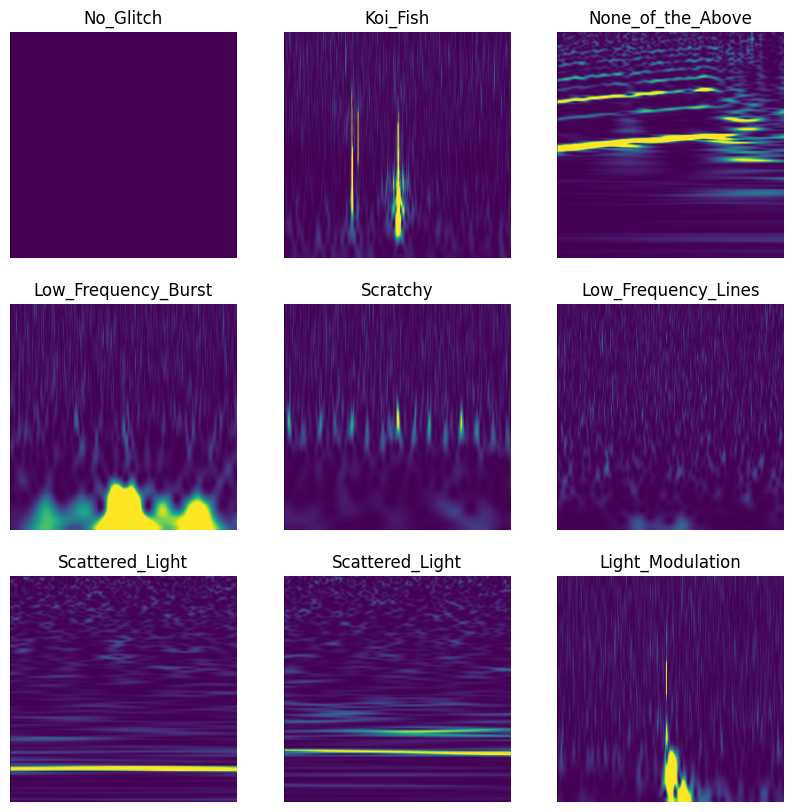

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size = AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size = AUTOTUNE)

In [16]:
#Custom Label smoothing loss function
class LabelSmoothingLoss(tf.keras.losses.Loss):
    def __init__(self, smoothing=0.1):
        super(LabelSmoothingLoss, self).__init__()
        self.smoothing =  smoothing
        
    def call(self, y_true, y_pred):
        num_classes = y_pred.shape[-1]
        confidence = 1.0 - self.smoothing
        smooth_labels = tf.one_hot(tf.cast(y_true, tf.int32), depth=num_classes)
        smooth_labels = smooth_labels * confidence + (1 - confidence)/num_classes
        return tf.keras.losses.categorical_crossentropy(smooth_labels, y_pred)

In [17]:
# Function to create a convolutional block
def conv_block(input_tensor, filters, kernel_size):
    x = layers.Conv2D(filters, kernel_size, padding = 'same')(input_tensor)
    x = layers.ReLU()(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size = (2, 2))(x)
    return x

In [18]:
#Function to create an inception residual block
def inception_residual_block(input_tensor, filters):
    x1 = layers.Conv2D(filters, (1, 1), padding ='same')(input_tensor)

    x2 = layers.Conv2D(filters, (1, 1), padding ='same')(input_tensor)
    x2 = layers.ReLU()(x2)
    x2 = layers.Conv2D(filters, (3, 3), padding ='same')(x2)

    x3 = layers.Conv2D(filters, (1, 1), padding ='same')(input_tensor)
    x3 = layers.ReLU()(x3)
    x3 = layers.Conv2D(filters, (5, 5), padding ='same')(x3)

    x4 = layers.MaxPooling2D((3, 3), strides = (1, 1), padding = 'same')(input_tensor)
    x4 = layers.Conv2D(filters, (1, 1), padding = 'same')(x4)

    x = layers.concatenate([x1, x2, x3, x4], axis = -1)
    return x

In [19]:
# Function to create a post-convolutional block
def post_conv_block(input_tensor, filters, kernel_size):
    x = layers.Conv2D(filters, kernel_size, padding ='same')(input_tensor)
    x = layers.ReLU()(x)
    x = layers.BatchNormalization()(x)
    return x

In [20]:
#Function to create the complete branch
def branch(input_tensor):
    x = conv_block(input_tensor, filters = 32, kernel_size = (3, 3))
    for _ in range(3):
        x = inception_residual_block(x, filters = 32)
        x = post_conv_block(x, filters = 32, kernel_size = (3, 3))
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation = 'relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Dropout(0.5)(x) # Dropout after FC layer
    return x

In [21]:
# Input layer
input_tensor = layers.Input(shape=(256, 256, 3))

# Load MobileNet model with pre-trained ImageNet weights
base_model = tf.keras.applications.MobileNet(weights = 'imagenet', include_top = False, input_tensor = input_tensor)

# Freeze the pre-trained weights
base_model.trainable = False

/tmp/ipykernel_33/2108305900.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNet(weights = 'imagenet', include_top = False, input_tensor = input_tensor)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
# Get output of MobileNet
MobileNet_output = base_model.output

# Create four branches sharing common architecture
branches = [branch(MobileNet_output) for _ in range(4)]

# Concatenate the output of branches
x = layers.concatenate(branches)

In [24]:
num_classes = 22

#Create the model
output = layers.Dense(num_classes, activation = 'softmax')(x)
model = tf.keras.Model(inputs = base_model.input, outputs = output)

In [25]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate = 2e-5)
model.compile(optimizer = optimizer,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 128, 128,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        128 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu (ReLU)   │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_1           │ (None, 128, 128,  │        288 │ conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_1_bn        │ (None, 128, 128,  │        128 │ conv_dw_1[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_1_relu      │ (None, 128, 128,  │          0 │ conv_dw_1_bn[0][… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_1 (Conv2D)  │ (None, 128, 128,  │      2,048 │ conv_dw_1_relu[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_1_bn        │ (None, 128, 128,  │        256 │ conv_pw_1[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_1_relu      │ (None, 128, 128,  │          0 │ conv_pw_1_bn[0][… │
│ (ReLU)              │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pad_2          │ (None, 129, 129,  │          0 │ conv_pw_1_relu[0… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_2           │ (None, 64, 64,    │        576 │ conv_pad_2[0][0]  │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_2_bn        │ (None, 64, 64,    │        256 │ conv_dw_2[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_2_relu      │ (None, 64, 64,    │          0 │ conv_dw_2_bn[0][… │
│ (ReLU)              │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_2 (Conv2D)  │ (None, 64, 64,    │      8,192 │ conv_dw_2_relu[0… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_2_bn        │ (None, 64, 64,    │        512 │ conv_pw_2[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_2_relu      │ (None, 64, 64,    │          0 │ conv_pw_2_bn[0][

 Total params: 5,870,550 (22.39 MB)

 Trainable params: 2,640,662 (10.07 MB)

 Non-trainable params: 3,229,888 (12.32 MB)

In [27]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  
    patience=5,   
    min_delta=0.005,
    restore_best_weights=True  
)

In [29]:
history = model.fit(
     train_dataset,
     epochs = 3,
     validation_data = validation_dataset,
     callbacks = [early_stopping_callback]  
) 

Epoch 1/3
559/559 ━━━━━━━━━━━━━━━━━━━━ 934s 2s/step - accuracy: 0.4099 - loss: 15.6155 - val_accuracy: 0.8067 - val_loss: 13.2362
Epoch 2/3
559/559 ━━━━━━━━━━━━━━━━━━━━ 862s 2s/step - accuracy: 0.7793 - loss: 13.0079 - val_accuracy: 0.8610 - val_loss: 11.7268
Epoch 3/3
559/559 ━━━━━━━━━━━━━━━━━━━━ 866s 2s/step - accuracy: 0.8510 - loss: 11.4440 - val_accuracy: 0.8834 - val_loss: 10.3312


In [30]:
test_loss, test_accuracy = model.evaluate(test_dataset)

148/148 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.9207 - loss: 10.2381


In [31]:
predicted=model.predict(test_dataset)

148/148 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step


In [32]:
predicted_labels = np.argmax(predicted, axis=1)

In [33]:
true_labels=[]
for element in test_dataset:
    true_labels.extend(element[1].numpy())

In [34]:
label_names.sort()
label_names

['1080Lines',
 '1400Ripples',
 'Air_Compressor',
 'Blip',
 'Chirp',
 'Extremely_Loud',
 'Helix',
 'Koi_Fish',
 'Light_Modulation',
 'Low_Frequency_Burst',
 'Low_Frequency_Lines',
 'No_Glitch',
 'None_of_the_Above',
 'Paired_Doves',
 'Power_Line',
 'Repeating_Blips',
 'Scattered_Light',
 'Scratchy',
 'Tomte',
 'Violin_Mode',
 'Wandering_Line',
 'Whistle']

In [35]:
df = pd.DataFrame(0,index=label_names, columns=label_names)

In [36]:
indices=len(predicted_labels)
for i in range(indices):             
    df.loc[label_names[predicted_labels[i]],label_names[true_labels[i]]]+=1

In [37]:
df

1080Lines  1400Ripples  Air_Compressor  Blip  Chirp  \
1080Lines                  184            6               0     0      0   
1400Ripples                  3           24               0     0      0   
Air_Compressor               0            0              30     0      0   
Blip                         2            0               0  1059     25   
Chirp                        0            0               0     0     15   
Extremely_Loud               0            0               0     0      0   
Helix                        2            0               1     3      0   
Koi_Fish                     0            0               0     4      0   
Light_Modulation             0            0               0     2      0   
Low_Frequency_Burst          1            0               0     1      0   
Low_Frequency_Lines          2            0               0     8      0   
No_Glitch                    3            0               0     1      0   
None_of_the_Above            0            0               0     0      0   
Paired_Doves                 0            0               0     0      0   
Power_Line                   0            0               5     0      0   
Repeating_Blips              0            0               0    11      0   
Scattered_Light              1            0               0     0      0   
Scratchy                     0            0               0     1      0   
Tomte                        0            0               0     2      0   
Violin_Mode                  1            6               0     0      0   
Wandering_Line               0            0               0     0      0   
Whistle                      1            0               0     0      0   

                     Extremely_Loud  Helix  Koi_Fish  Light_Modulation  \
1080Lines                         0      0         0                 0   
1400Ripples                       0      0         0                 0   
Air_Compressor                    0      0         0                 0   
Blip                              0      3        16                 5   
Chirp                             0      0         0                 0   
Extremely_Loud                  240      0         7                 5   
Helix                             0    163         0                 2   
Koi_Fish                         13      0       383                 8   
Light_Modulation                  2      0         2               269   
Low_Frequency_Burst               0      0         0                14   
Low_Frequency_Lines               0      0         0                 0   
No_Glitch                         0      0         0                 0   
None_of_the_Above                 1      0         0                 2   
Paired_Doves                      0      0         0                 0   
Power_Line                        0      0         0                 0   
Repeating_Blips                   0      2         0                 6   
Scattered_Light                   0      0         0                 0   
Scratchy                          0      0         0                 1   
Tomte                             0      0         0                 0   
Violin_Mode                       0      0         0                 0   
Wandering_Line                    0      0         0                 0   
Whistle                           0      0         0                 0   

                     Low_Frequency_Burst  ...  None_of_the_Above  \
1080Lines                              0  ...                  0   
1400Ripples                            3  ...                  0   
Air_Compressor                         0  ...                  3   
Blip                                   0  ...                  0   
Chirp                                  0  ...                  0   
Extremely_Loud                         0  ...                  1   
Helix                                  1  ...                  1   
Koi_Fish                 

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert true_labels from tensor to numpy array
true_labels = np.array(true_labels)

# Generate classification report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       200
           1       0.52      0.67      0.59        36
           2       0.83      0.83      0.83        36
           3       0.90      0.97      0.93      1092
           4       1.00      0.38      0.55        40
           5       0.89      0.94      0.91       256
           6       0.85      0.97      0.91       168
           7       0.90      0.94      0.92       408
           8       0.91      0.86      0.88       312
           9       0.86      0.90      0.88       360
          10       0.83      0.88      0.85       264
          11       0.64      0.44      0.52        84
          12       0.57      0.27      0.37        44
          13       0.00      0.00      0.00        16
          14       0.94      0.96      0.95       272
          15       0.83      0.74      0.78       148
          16       0.96      0.92      0.94       268
          17       0.94    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


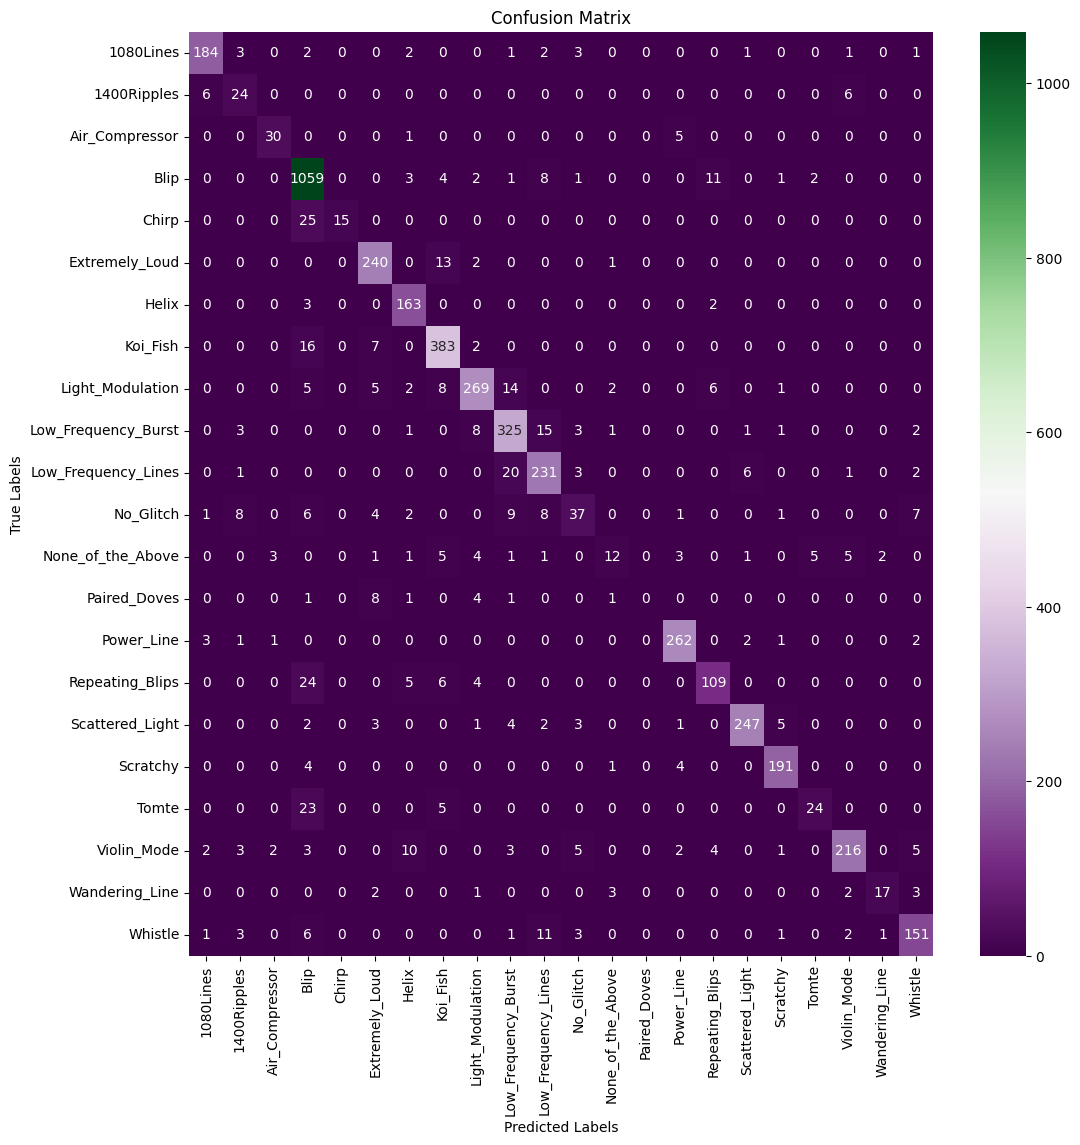

In [39]:
import seaborn as sns

cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='PRGn', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()